### Startup Success Prediction Using Linear Regression


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv("C:/Users/svish/OneDrive/Desktop/startupds/50_startups.csv")

df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding for "State"
X = df.drop("Profit", axis=1)
y = df["Profit"]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 6961.477813252382
MSE: 82010363.04430111
RMSE: 9055.957323458471
R2 Score: 0.8987266414328636


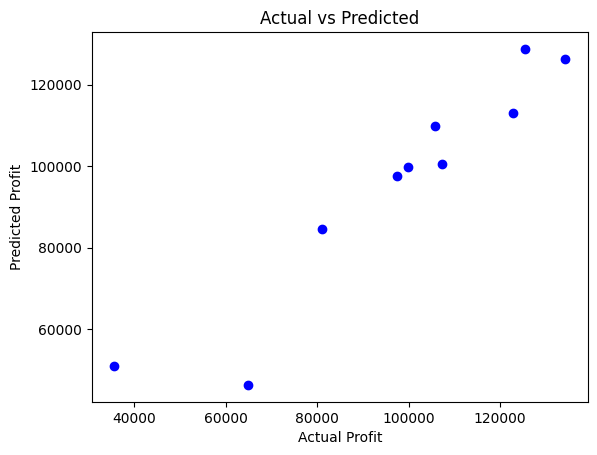

In [15]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted")
plt.show()


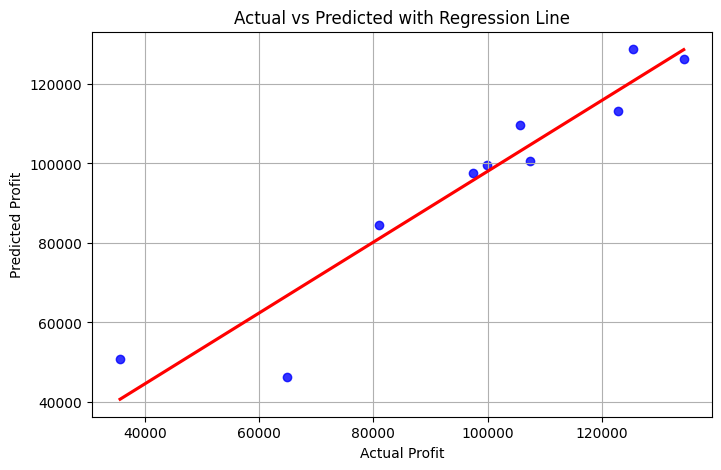

In [17]:
import pickle

with open("startup_profit_model.pkl", "wb") as f:
    pickle.dump(model, f)
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted with Regression Line")
plt.grid(True)
plt.show()